In [98]:
import pandas as pd
import numpy as np
import pickle
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
pd.options.display.max_rows=999

In [13]:
nrc = pd.read_csv("../data/nrc_song_lyrics.csv")
nrc = nrc.drop("Unnamed: 0", axis=1)
BB_Song = pd.read_csv("../data/hot_stuff_with_time.csv")
BB_Song = BB_Song.drop("Unnamed: 0", axis=1)

In [14]:
nrc.head()

,song,artist,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,word_count
0,sauce it up,lil uzi vert,7,8,5,8,8,17,11,5,5,10,84
1,backroad song,granger smith,6,5,3,4,7,8,10,3,2,9,57
2,feelin' satisfied,boston,2,5,3,3,5,4,8,4,4,3,41
3,saturday morning confusion,bobby russell,12,13,9,11,10,26,19,9,10,13,132
4,country man,luke bryan,4,6,3,2,7,8,11,0,3,7,51


In [15]:
BB_Song.head()

,name,artist,release,peak,duration,SemiYearID,WeekID,QuarterID
0,don't you worry child,swedish house mafia featuring john martin,2012.750000,6,33,2012.5,2012-10-06,2012.75
1,don't you worry,don gardner and dee dee ford,1962.583333,66,7,1962.5,1962-08-25,1962.50
2,don't you write her off,"mcguinn, clark & hillman",1979.166667,33,11,1979.0,1979-03-17,1979.00
3,don't,billy currington,2008.833333,52,20,2008.5,2008-11-08,2008.75
4,don't,bryson tiller,2015.750000,13,34,2015.5,2015-10-17,2015.75


In [16]:
nrc_BB = pd.DataFrame(nrc.merge(BB_Song, left_on=["song", "artist"], right_on=["name", "artist"], how="inner")).reset_index(drop=True)

In [17]:
nrc_BB.shape

(22711, 20)

In [18]:
nrc_BB.head()

,song,artist,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,word_count,name,release,peak,duration,SemiYearID,WeekID,QuarterID
0,sauce it up,lil uzi vert,7,8,5,8,8,17,11,5,5,10,84,sauce it up,2017.666667,49,15,2017.5,2017-09-16,2017.50
1,backroad song,granger smith,6,5,3,4,7,8,10,3,2,9,57,backroad song,2015.916667,49,16,2015.5,2015-12-26,2015.75
2,feelin' satisfied,boston,2,5,3,3,5,4,8,4,4,3,41,feelin' satisfied,1979.166667,46,7,1979.0,1979-03-24,1979.00
3,saturday morning confusion,bobby russell,12,13,9,11,10,26,19,9,10,13,132,saturday morning confusion,1971.500000,28,14,1971.0,1971-07-10,1971.50
4,country man,luke bryan,4,6,3,2,7,8,11,0,3,7,51,country man,2008.666667,74,9,2008.5,2008-09-20,2008.50


In [19]:
categories = [i for i in nrc.columns.tolist() if i != "song" and i != "artist"]

In [22]:
nrc_BB_SemiYear = pd.DataFrame(nrc_BB.groupby("SemiYearID").sum()[[i for i in nrc.columns.tolist() if i != "song" and i != "artist"]]).reset_index()

In [23]:
nrc_BB_Quarter = pd.DataFrame(nrc_BB.groupby("QuarterID").sum()[[i for i in nrc.columns.tolist() if i != "song" and i != "artist"]]).reset_index()

In [25]:
for k in categories:
    nrc_BB_SemiYear[k] = [i/j for i, j in zip(nrc_BB_SemiYear[k], nrc_BB_SemiYear["word_count"])]

In [26]:
for k in categories:
    nrc_BB_Quarter[k] = [i/j for i, j in zip(nrc_BB_Quarter[k], nrc_BB_Quarter["word_count"])]

In [27]:
nrc_BB_SemiYear.head()

,SemiYearID,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,word_count
0,1958.5,0.048482,0.111380,0.032917,0.067874,0.131283,0.143149,0.205792,0.079357,0.053968,0.125797,1.0
1,1959.0,0.054727,0.108730,0.033879,0.075720,0.125959,0.148979,0.192993,0.080353,0.062545,0.116114,1.0
2,1959.5,0.048016,0.108897,0.036057,0.069215,0.131002,0.144229,0.205834,0.077369,0.055988,0.123392,1.0
3,1960.0,0.049347,0.107107,0.036288,0.069563,0.129206,0.142893,0.201030,0.078101,0.057634,0.128830,1.0
4,1960.5,0.047997,0.108408,0.032274,0.072824,0.134558,0.136875,0.206554,0.075141,0.056935,0.128434,1.0


In [28]:
nrc_BB_Quarter.head()

,QuarterID,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,word_count
0,1958.50,0.049877,0.111864,0.033662,0.064860,0.131979,0.142036,0.206281,0.080049,0.053366,0.126026,1.0
1,1958.75,0.046190,0.110587,0.031693,0.072825,0.130142,0.144976,0.204990,0.078220,0.054956,0.125421,1.0
2,1959.00,0.053161,0.109468,0.035546,0.074552,0.127713,0.150991,0.194086,0.080843,0.060396,0.113243,1.0
3,1959.25,0.056319,0.108860,0.032280,0.078297,0.123970,0.150412,0.190247,0.078984,0.064560,0.116071,1.0
4,1959.50,0.049766,0.106557,0.040984,0.072014,0.124122,0.149883,0.197307,0.081382,0.059133,0.118852,1.0


In [30]:
nrc_BB_SemiYear = nrc_BB_SemiYear.drop("word_count", axis=1)
nrc_BB_Quarter = nrc_BB_Quarter.drop("word_count", axis=1)

In [61]:
categories.remove("word_count")

In [66]:
def plot_category_percent_over_year(df, timegran):
    fig, ax = plt.subplots(len(categories) // 2, 2, figsize=(30, 40))
    for i in range(len(categories)):
        ax = plt.subplot(len(categories) // 2 , 2, i + 1)
        k = categories[i]
        if k != "word_count":
            plt.plot(df[timegran], df[k], label=k)
            plt.title("{} Category Percentage by SemiYear".format(k), fontsize=16)
            plt.ylabel("Category Percentage", fontsize=14)
            plt.xlabel("Year ID", fontsize=14)
            plt.legend(fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(list(range(int(min(df[timegran])), int(max(df[timegran])) + 5, 5)))
    plt.show()

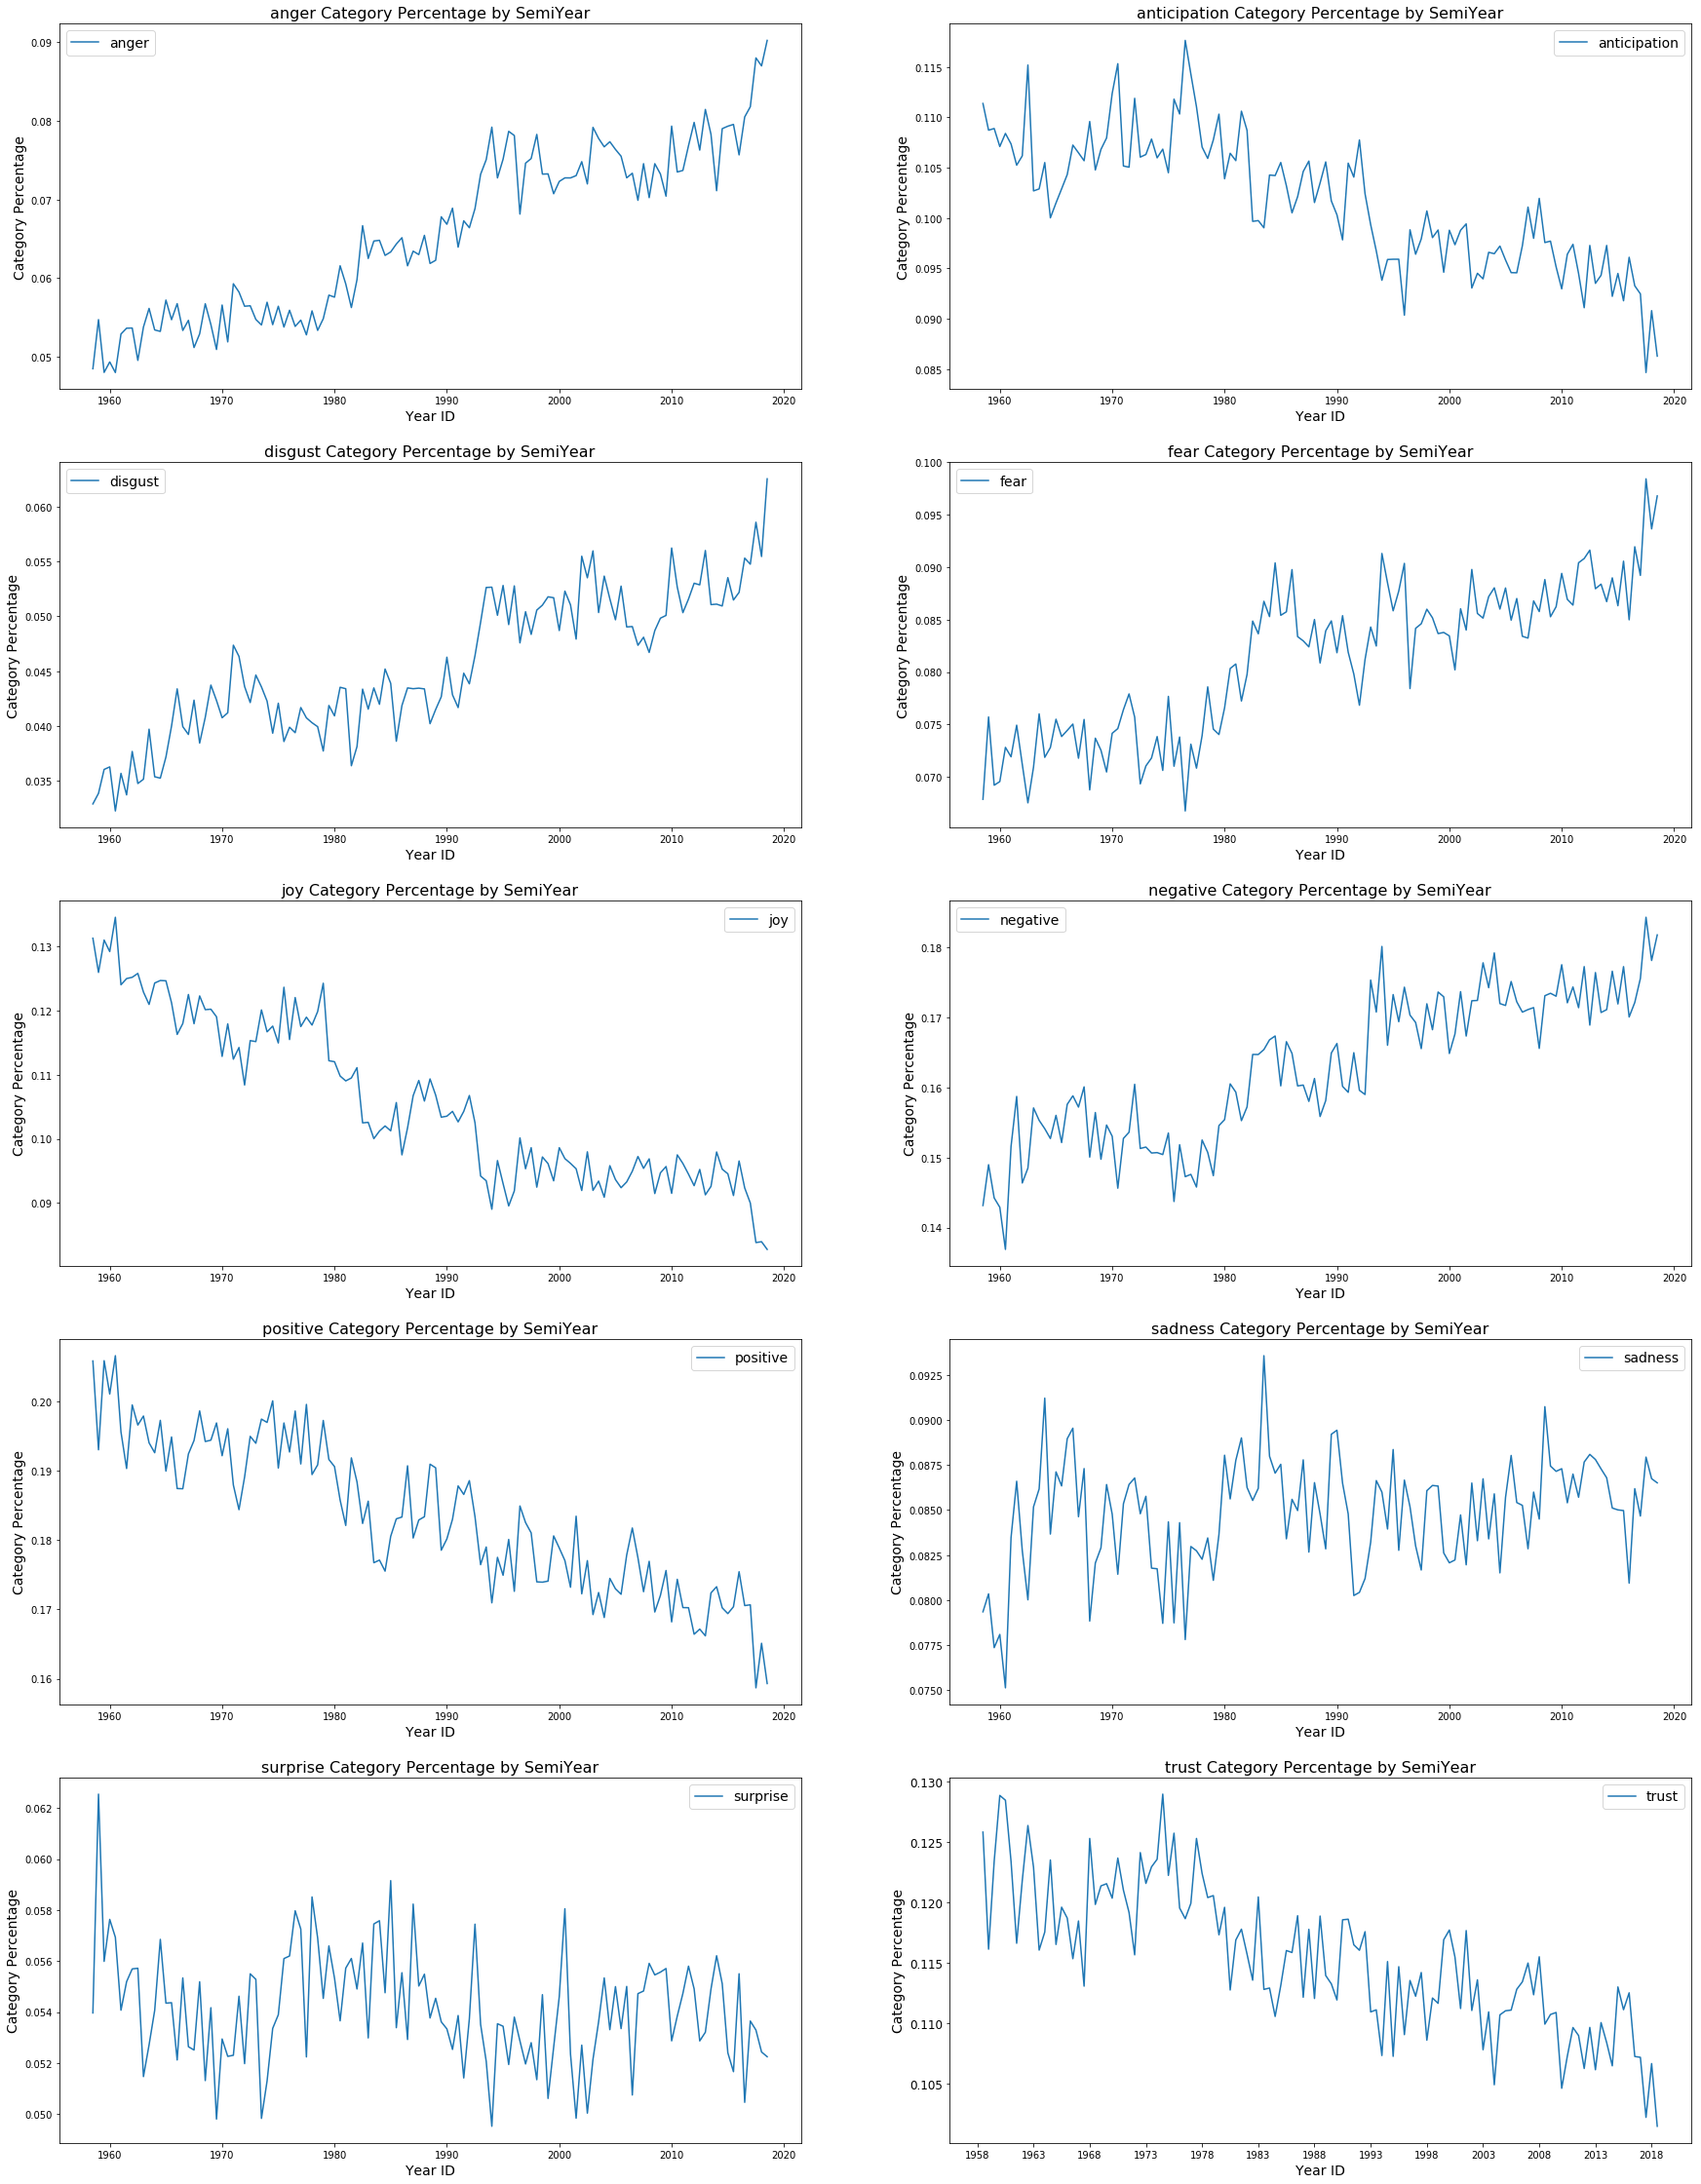

In [68]:
plot_category_percent_over_year(nrc_BB_SemiYear, "SemiYearID")

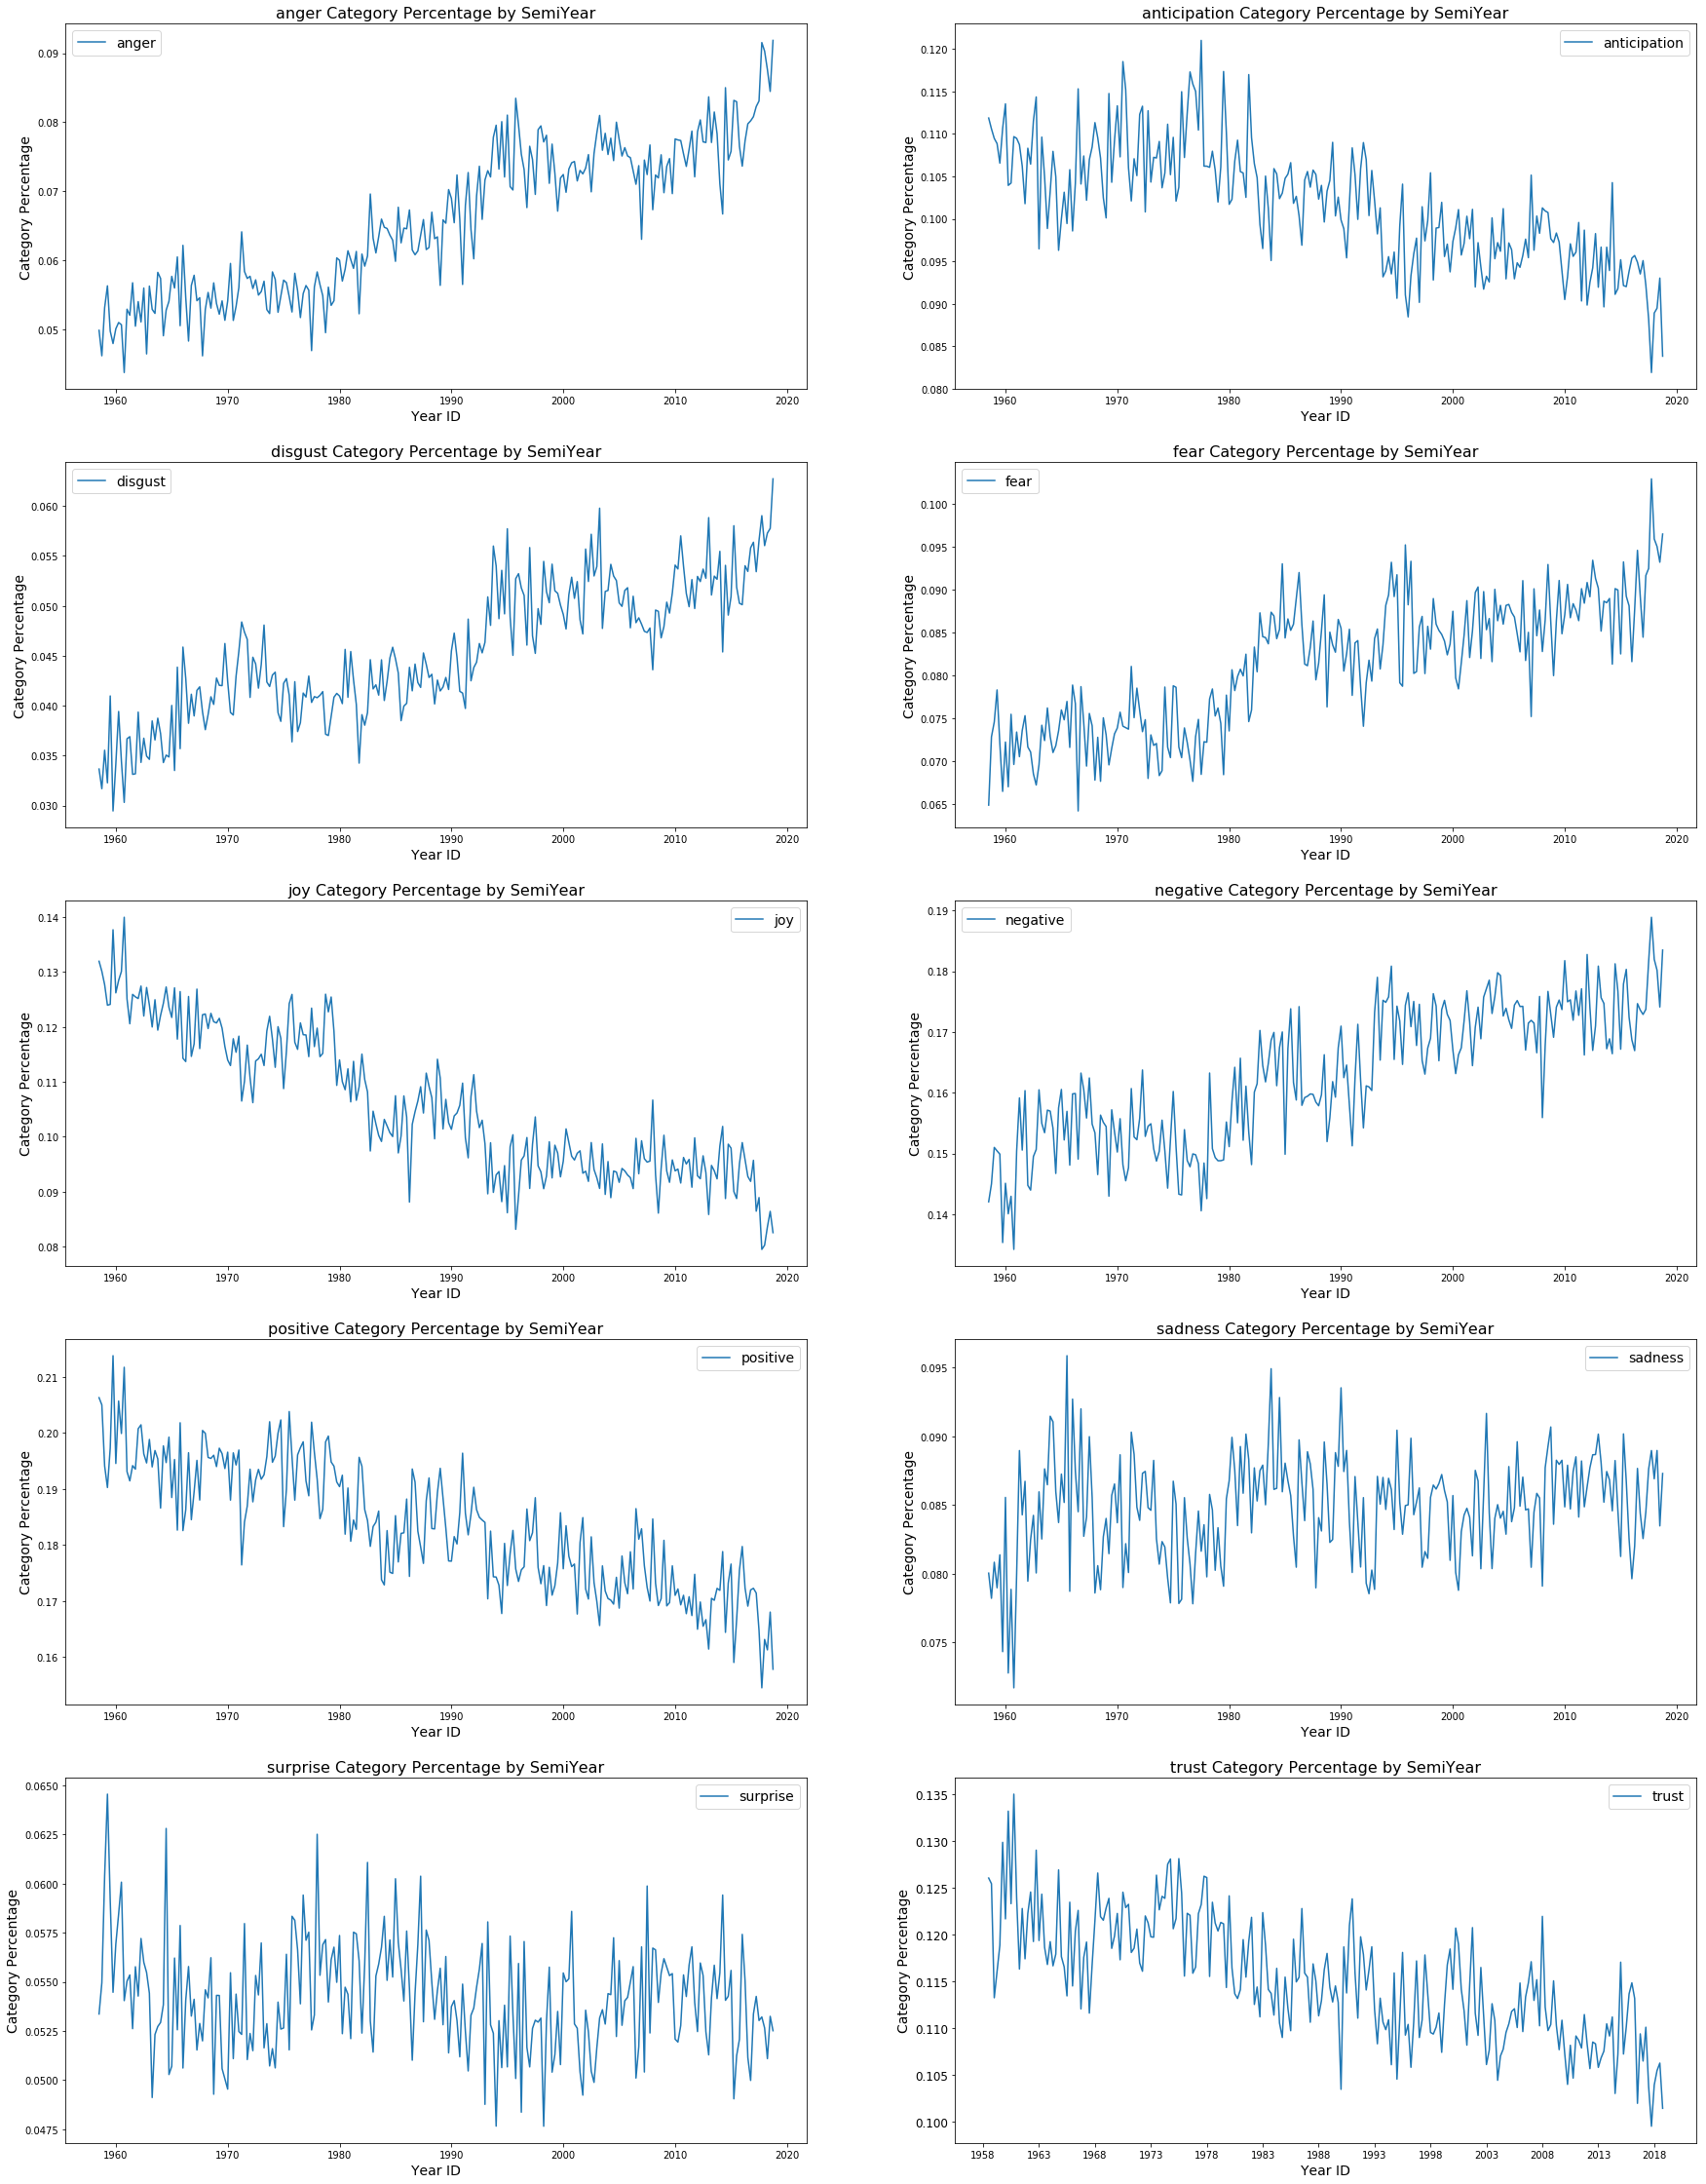

In [69]:
plot_category_percent_over_year(nrc_BB_Quarter, "QuarterID")

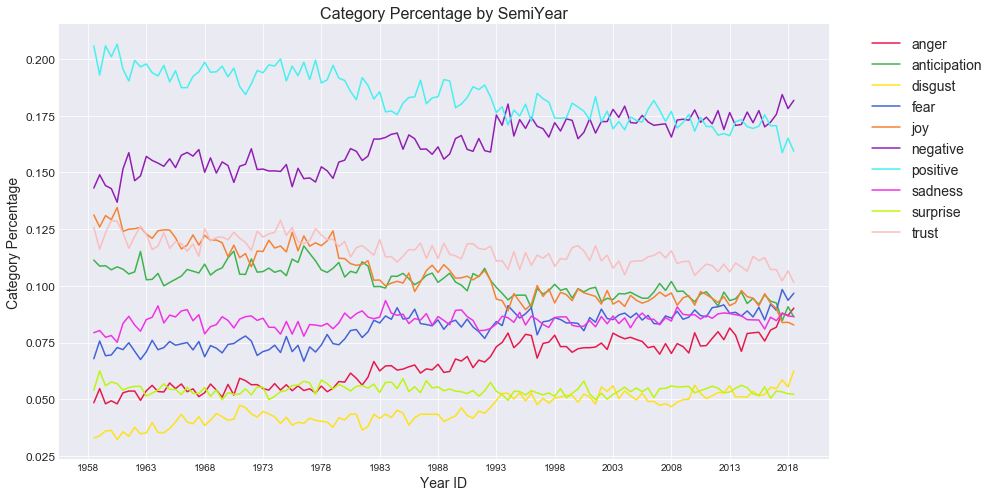

In [70]:
plt.figure(figsize=(13.8, 8))
sns.set_style("darkgrid")
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
for i,k in enumerate(categories):
    if k != "word_count":
        plt.plot(nrc_BB_SemiYear["SemiYearID"],nrc_BB_SemiYear[k], label=k,color=colors[i])
plt.legend(fontsize=14, bbox_to_anchor=(1.04,1))
plt.title("Category Percentage by SemiYear", fontsize=16)
plt.ylabel("Category Percentage", fontsize=14)
plt.xlabel("Year ID", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(list(range(int(min(nrc_BB_SemiYear["SemiYearID"])), int(max(nrc_BB_SemiYear["SemiYearID"])) + 5, 5)))
plt.show()

In [71]:
econ_master = pd.read_csv("../data/Econ/econ_master.csv")
econ_master = econ_master.drop("Unnamed: 0", axis=1)

In [73]:
econ_master.isna().agg({i: sum for i in econ_master.columns})

DATE                 0
Apparel              0
QuarterID            0
LoanRate            59
Food&Beverages      37
Fruits&Veggie        0
Gas                  8
Meats               37
MedicalCare          0
PersonalIncome       5
GDP                  1
HouseholdIncome    212
Housing              0
Unemployment         0
SemiYearID           0
dtype: int64

In [74]:
econ_master.head()

,DATE,Apparel,QuarterID,LoanRate,Food&Beverages,Fruits&Veggie,Gas,Meats,MedicalCare,PersonalIncome,GDP,HouseholdIncome,Housing,Unemployment,SemiYearID
0,1958-01-01,0.22405,1958.00,NaN,NaN,8.00493,-1.12518,NaN,1.16667,NaN,-10.0,NaN,0.44723,6.300000,1958.0
1,1958-04-01,0.00000,1958.25,NaN,NaN,3.07868,-0.71124,NaN,1.31796,NaN,2.7,NaN,0.44524,7.366667,1958.0
2,1958-07-01,-0.22355,1958.50,NaN,NaN,-5.19912,2.72206,NaN,1.30081,NaN,9.6,NaN,0.26596,7.333333,1958.5
3,1958-10-01,0.00000,1958.75,NaN,NaN,0.00000,-3.06834,NaN,1.28411,NaN,9.7,NaN,0.35367,6.366667,1958.5
4,1959-01-01,0.22405,1959.00,NaN,NaN,-1.28355,0.00000,NaN,0.79239,NaN,7.9,NaN,0.35242,5.833333,1959.0


In [75]:
econ_categories = list(set(econ_master.columns) - set(["QuarterID", "DATE", "SemiYearID", "LoanRate", "Food&Beverages", "Meats", "HouseholdIncome"]))

In [76]:
econ_categories

['Gas',
 'Unemployment',
 'MedicalCare',
 'PersonalIncome',
 'Fruits&Veggie',
 'GDP',
 'Apparel',
 'Housing']

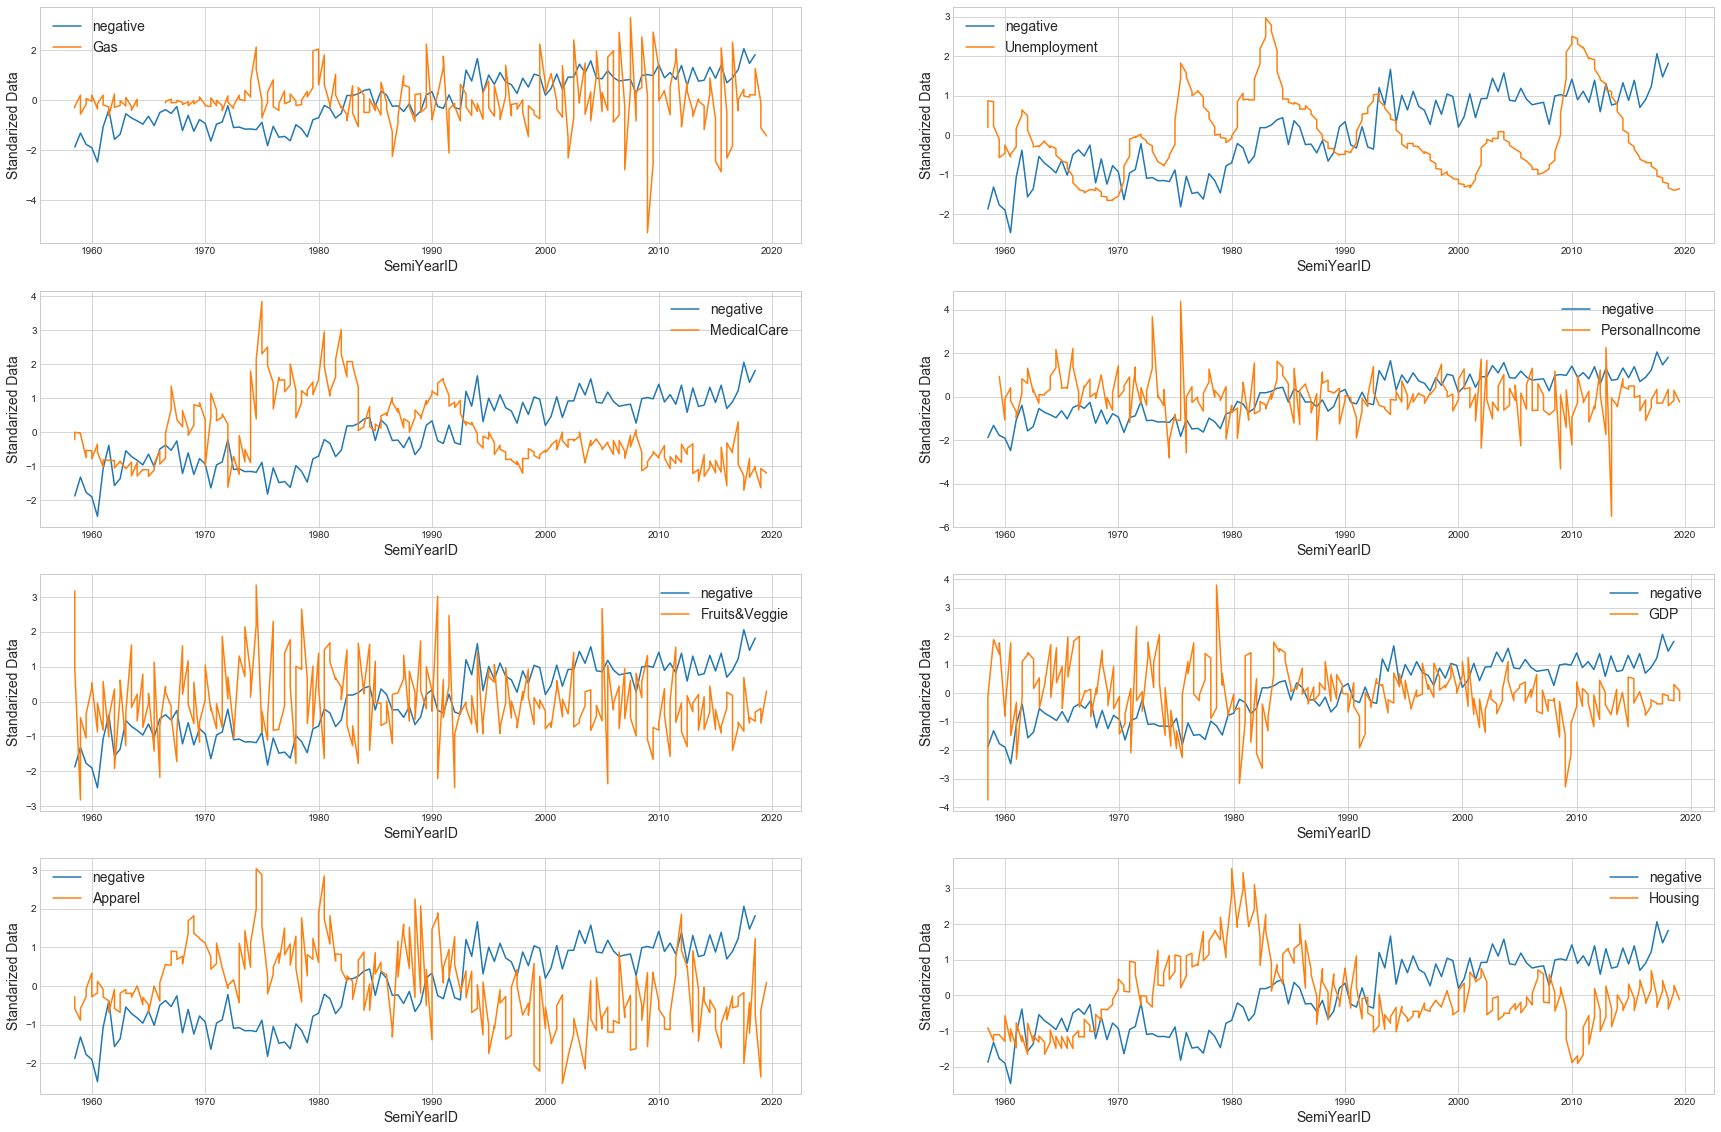

In [79]:
category_name = "negative"
fig, ax = plt.subplots(2, 2, figsize=(30, 20))
sns.set_style("whitegrid")
for i in range(len(econ_categories)):
    ax = plt.subplot(len(econ_categories)//2, 2,i+1)
    data = nrc_BB_SemiYear[category_name]
    econ_data = econ_master[econ_categories[i]]
    plt.plot(nrc_BB_SemiYear["SemiYearID"], [(i - np.mean(data)) / np.std(data) for i in data], label=category_name)
    plt.plot([i+0.5 for i in econ_master["SemiYearID"]], [(i - np.mean(econ_data)) / np.std(econ_data) for i in econ_data], label=econ_categories[i])
    plt.legend(fontsize=14)
    plt.xlabel("SemiYearID", fontsize=14)
    plt.ylabel("Standarized Data", fontsize=14)


In [81]:
nrc_BB_SemiYear_percent = pd.DataFrame()
for c in categories:
    if c != 'word_count':
        nrc_BB_SemiYear_percent[c] = [(nrc_BB_SemiYear.loc[i, c] - nrc_BB_SemiYear.loc[i-1, c]) / nrc_BB_SemiYear.loc[i-1, c] 
                                     for i in range(1, nrc_BB_SemiYear.shape[0])]
nrc_BB_SemiYear_percent["SemiYearID"] = [nrc_BB_SemiYear.loc[i, 'SemiYearID'] for i in range(1, nrc_BB_SemiYear.shape[0])]

In [83]:
nrc_BB_Quarter_percent = pd.DataFrame()
for c in categories:
    if c != 'word_count':
        nrc_BB_Quarter_percent[c] = [(nrc_BB_Quarter.loc[i, c] - nrc_BB_Quarter.loc[i-1, c]) / nrc_BB_Quarter.loc[i-1, c] 
                                     for i in range(1, nrc_BB_Quarter.shape[0])]
nrc_BB_Quarter_percent["QuarterID"] = [nrc_BB_Quarter.loc[i, 'QuarterID'] for i in range(1, nrc_BB_Quarter.shape[0])]

In [84]:
nrc_BB_Quarter_percent.head()

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,QuarterID
0,-0.073916,-0.011416,-0.058500,0.122801,-0.013919,0.020701,-0.006258,-0.022854,0.029794,-0.004799,1958.75
1,0.150924,-0.010112,0.121582,0.023706,-0.018660,0.041486,-0.053191,0.033536,0.098991,-0.097099,1959.00
2,0.059391,-0.005559,-0.091869,0.050233,-0.029311,-0.003833,-0.019780,-0.023002,0.068946,0.024975,1959.25
3,-0.116353,-0.021151,0.269620,-0.080242,0.001226,-0.003518,0.037107,0.030364,-0.084060,0.023960,1959.50
4,-0.036253,0.038448,-0.281124,-0.077109,0.109543,-0.097160,0.083449,-0.086521,-0.078852,0.092438,1959.75


In [85]:
nrc_BB_SemiYear_percent.head()

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,SemiYearID
0,0.128818,-0.023794,0.029229,0.115593,-0.040556,0.040731,-0.062197,0.012554,0.158935,-0.076975,1959.0
1,-0.122629,0.001529,0.064305,-0.085906,0.040035,-0.031885,0.066540,-0.037138,-0.104834,0.062678,1959.5
2,0.027722,-0.016434,0.006408,0.005022,-0.013706,-0.009263,-0.023343,0.009466,0.029398,0.044069,1960.0
3,-0.027351,0.012145,-0.110620,0.046872,0.041419,-0.042114,0.027481,-0.037909,-0.012138,-0.003069,1960.5
4,0.102021,-0.009636,0.106158,-0.012333,-0.078227,0.107539,-0.053208,0.110923,-0.050223,-0.039386,1961.0


In [125]:
def get_time_elapse_heatmap(df, time_gran, time_elapsed, start_year, end_year):
    temp = df.copy()
    temp[time_gran] = [i+time_elapsed for i in temp[time_gran]]
    corr_matrix = temp[(temp[time_gran] < end_year) & (temp[time_gran] >= start_year)].merge(econ_master[econ_categories + [time_gran]], left_on=time_gran, right_on=time_gran, how="inner").drop(time_gran, axis=1)
    plt.figure(figsize=(40,20))
    sns.set(font_scale=1)
    a=sns.heatmap(corr_matrix.corr(), annot=True, fmt="g",cmap='viridis')
    return corr_matrix

In [137]:
econ_master

,DATE,Apparel,QuarterID,LoanRate,Food&Beverages,Fruits&Veggie,Gas,Meats,MedicalCare,PersonalIncome,GDP,HouseholdIncome,Housing,Unemployment,SemiYearID
0,1958-01-01,0.22405,1958.00,NaN,NaN,8.00493,-1.12518,NaN,1.16667,NaN,-10.0,NaN,0.44723,6.300000,1958.0
1,1958-04-01,0.00000,1958.25,NaN,NaN,3.07868,-0.71124,NaN,1.31796,NaN,2.7,NaN,0.44524,7.366667,1958.0
2,1958-07-01,-0.22355,1958.50,NaN,NaN,-5.19912,2.72206,NaN,1.30081,NaN,9.6,NaN,0.26596,7.333333,1958.5
3,1958-10-01,0.00000,1958.75,NaN,NaN,0.00000,-3.06834,NaN,1.28411,NaN,9.7,NaN,0.35367,6.366667,1958.5
4,1959-01-01,0.22405,1959.00,NaN,NaN,-1.28355,0.00000,NaN,0.79239,NaN,7.9,NaN,0.35242,5.833333,1959.0
5,1959-04-01,0.37258,1959.25,NaN,NaN,0.23641,1.72662,NaN,0.94340,1.61369,9.3,NaN,0.35119,5.100000,1959.0
6,1959-07-01,0.66815,1959.50,NaN,NaN,1.88679,0.84866,NaN,0.93458,-0.13595,0.3,NaN,0.26247,5.266667,1959.5
7,1959-10-01,0.22124,1959.75,NaN,NaN,2.19907,2.80505,NaN,0.77160,0.71059,1.1,NaN,0.61082,5.600000,1959.5
8,1960-01-01,0.29433,1960.00,NaN,NaN,-0.90600,-1.50068,NaN,1.07198,1.15566,9.3,NaN,0.26019,5.133333,1960.0
9,1960-04-01,0.51357,1960.25,NaN,NaN,0.91429,0.13850,NaN,0.90909,0.64612,-2.1,NaN,0.43253,5.233333,1960.0


In [139]:
econ_categories.append("LoanRate")

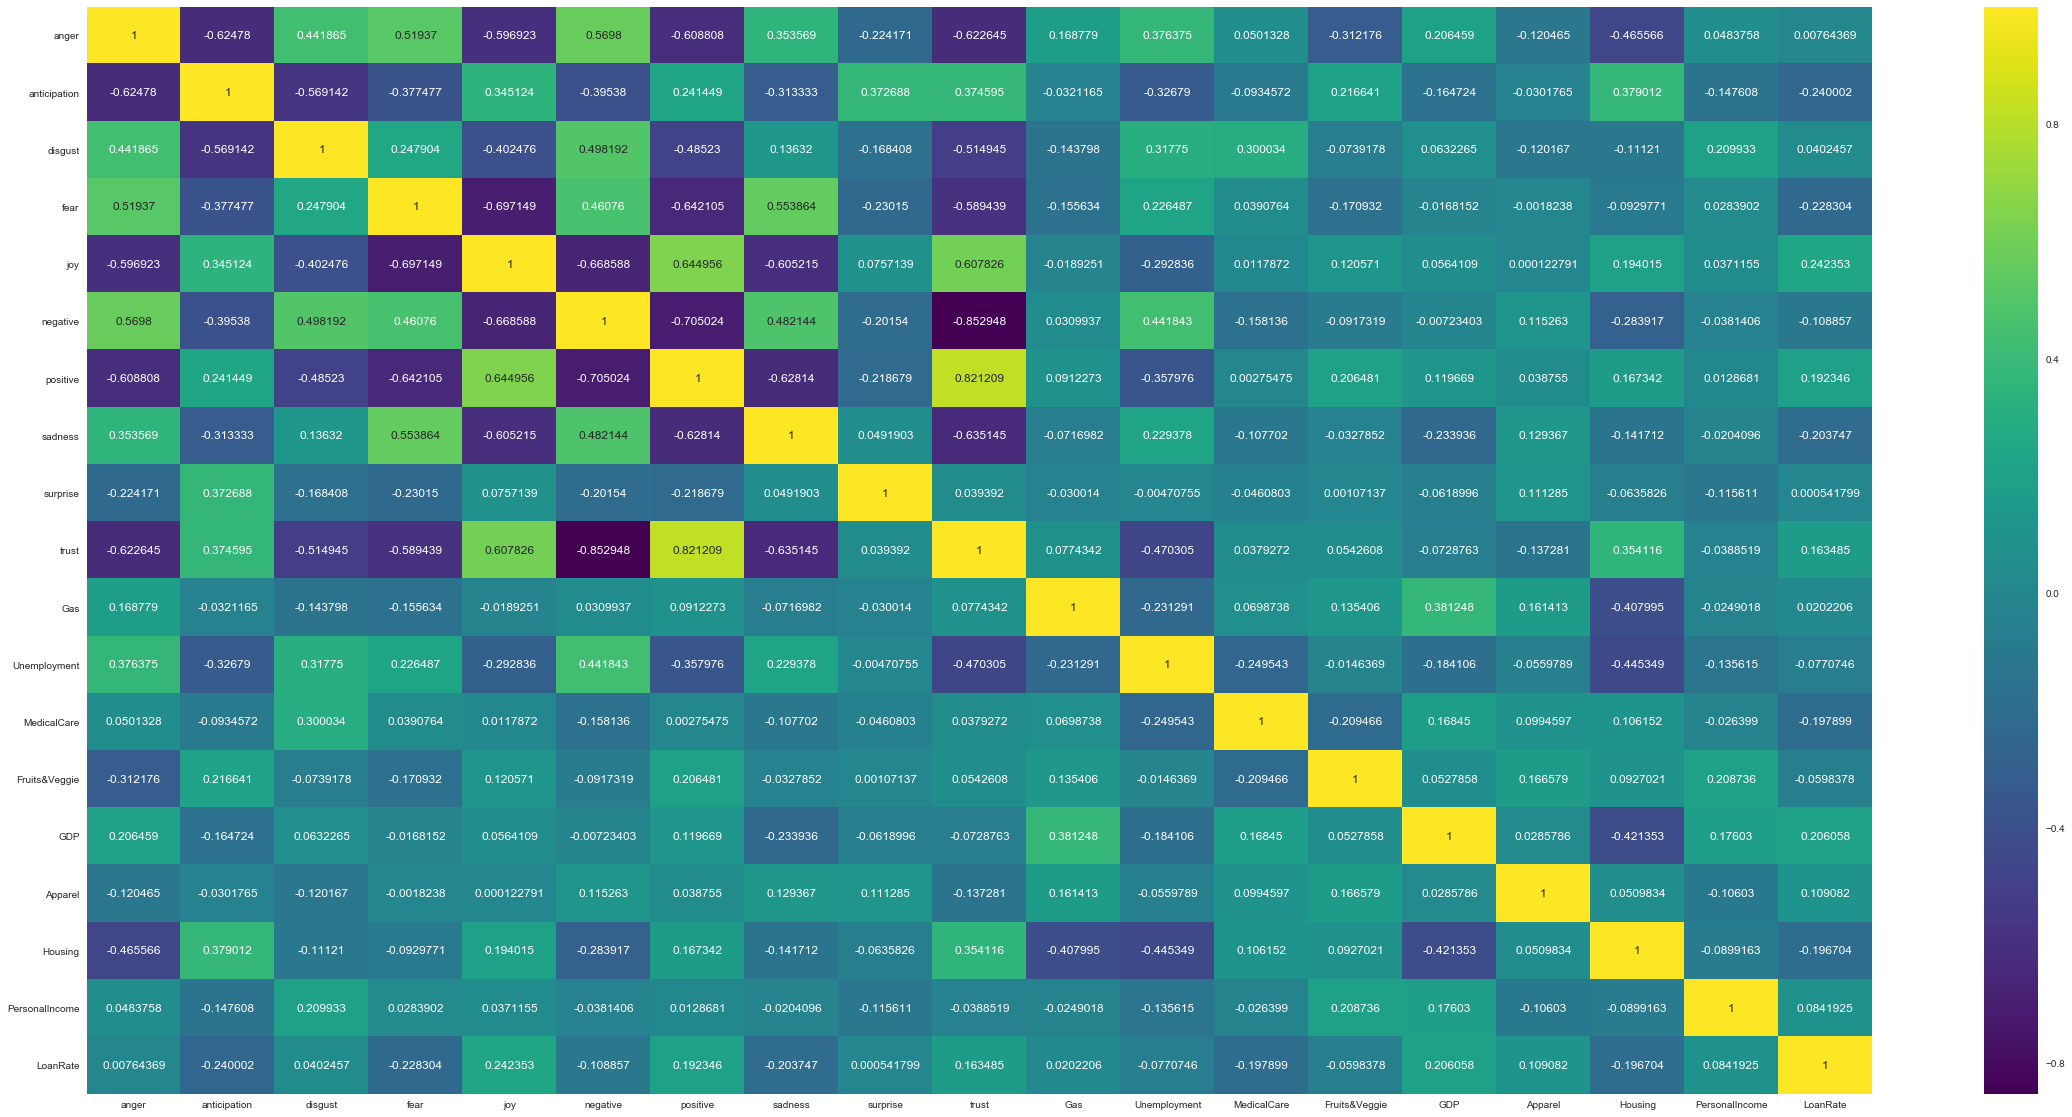

In [144]:
corr_matrix = get_time_elapse_heatmap(nrc_BB_Quarter, "QuarterID", -0.5, 2000, 2009)

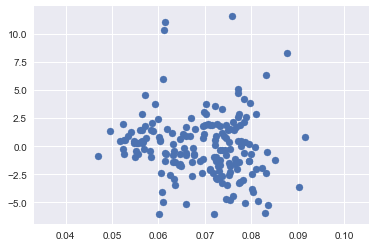

In [141]:
plt.scatter(corr_matrix["anger"], corr_matrix["LoanRate"])